In [105]:
import scipy.stats
import numpy as np
import statistics as stats

import matplotlib.pyplot as plt
import operator

## Úloha 1
Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

In [4]:
# Function to read file, returns title and text
def readFile(name):
    with open(name) as file:
        name = file.readline()
        buff = file.readline()
        file.close()
        
    return name, buff
    
name_x, text_x = readFile('data/011.txt')
name_y, text_y = readFile('data/008.txt')
    
text_y[:50]

'well prince so genoa and lucca are now just family'

### Pravdepodobnosti výskytu dĺžok slov

In [51]:
# Function to get word lengths, returns a dict
def getWordLengths(words):
    word_len = dict()

    for word in words:
        key = len(word)
        word_len[key] = word_len.get(key, 0) + 1
        
    return word_len

In [66]:
def plotGraph(text_x_data, text_y_data, title):
    width = 0.40

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(np.arange(len(text_x_data)) - width/2, text_x_data.values(), width, label = name_x, color='lightskyblue')
    ax.bar(np.arange(len(text_y_data)) + width/2, text_y_data.values(), width, label = name_y)

    ax.set_title(title, fontsize=12)

    plt.xticks(np.arange(len(text_x_data)), text_x_data.keys(), fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend()

    plt.show()

#### Text x

In [52]:
# Get word length counts for text x
words_x = text_x.split()

word_len_x = getWordLengths(words_x)
print(sorted(word_len_x.items()))

[(1, 101), (2, 217), (3, 343), (4, 257), (5, 119), (6, 87), (7, 55), (8, 28), (9, 20), (10, 12), (11, 14), (12, 2), (13, 3), (14, 1), (15, 1)]


In [64]:
# Text x word length probabilities, counts normalized by word count
word_len_norm_x = {key: val / len(words_x) for key, val in word_len_x.items()}
word_len_norm_x

{7: 0.04365079365079365,
 4: 0.20396825396825397,
 2: 0.17222222222222222,
 3: 0.2722222222222222,
 10: 0.009523809523809525,
 8: 0.022222222222222223,
 6: 0.06904761904761905,
 11: 0.011111111111111112,
 5: 0.09444444444444444,
 1: 0.08015873015873017,
 15: 0.0007936507936507937,
 9: 0.015873015873015872,
 12: 0.0015873015873015873,
 13: 0.002380952380952381,
 14: 0.0007936507936507937}

In [65]:
# Just to make sure the word length probabilities sum up to 1
sum(list(word_len_norm_x.values()))

1.0

#### Text y

In [67]:
# Get word length counts for text y
words_y = text_y.split()

word_len_y = getWordLengths(words_y)
print(sorted(word_len_y.items()))

[(1, 39), (2, 192), (3, 282), (4, 205), (5, 103), (6, 85), (7, 102), (8, 55), (9, 33), (10, 28), (11, 12), (12, 10), (13, 4)]


In [68]:
# Add word lengths from text x not present in text y
word_len_y.update({14:0, 15:0})
print(sorted(word_len_y.items()))

[(1, 39), (2, 192), (3, 282), (4, 205), (5, 103), (6, 85), (7, 102), (8, 55), (9, 33), (10, 28), (11, 12), (12, 10), (13, 4), (14, 0), (15, 0)]


In [69]:
# Text y word length probabilities, counts normalized by word count
word_len_norm_y = {key: val / len(words_y) for key, val in word_len_y.items()}
word_len_norm_y

{4: 0.1782608695652174,
 6: 0.07391304347826087,
 2: 0.16695652173913045,
 5: 0.08956521739130435,
 3: 0.24521739130434783,
 7: 0.08869565217391304,
 11: 0.010434782608695653,
 1: 0.03391304347826087,
 8: 0.04782608695652174,
 10: 0.02434782608695652,
 9: 0.028695652173913042,
 12: 0.008695652173913044,
 13: 0.0034782608695652175,
 14: 0.0,
 15: 0.0}

In [70]:
# Just to make sure the word length probabilities sum up to 1
sum(list(word_len_norm_y.values()))

0.9999999999999999

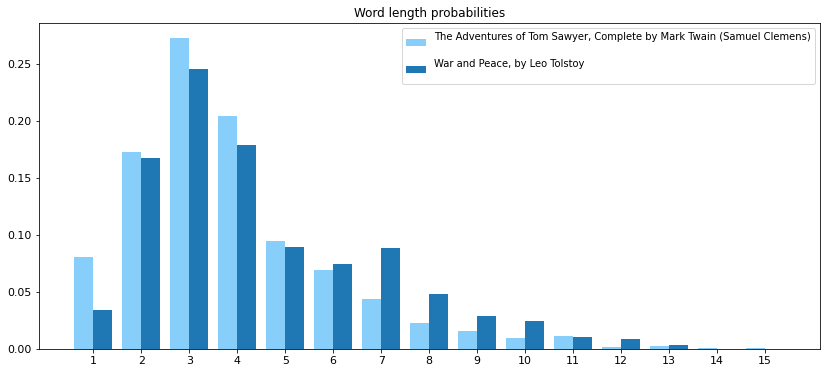

In [76]:
plotGraph(dict(sorted(word_len_norm_x.items())), dict(sorted(word_len_norm_y.items())), 'Word length probabilities')

#### Základné charakteristiky dĺžok slov - stredná hodnota a rozptyl

In [85]:
def getExpectedValue(probabilities):
    E = 0
    for value, probab in probabilities.items():
        E += (value * probab)
    
    return E

In [86]:
E_x = getExpectedValue(word_len_norm_x)
E_x

3.86031746031746

In [160]:
np.average(list(word_len_norm_x.keys()), axis=0, weights=list(word_len_norm_x.values()))

3.8603174603174604

In [87]:
E_y = getExpectedValue(word_len_norm_y)
E_y

4.477391304347826

In [104]:
np.average(list(word_len_norm_y.keys()), axis=0, weights=list(word_len_norm_y.values()))

4.477391304347828

In [152]:
def getVariance(words, E):
    var = 0
    lengths = []

    for word in words:
        var += ((len(word) - E) ** 2)
        lengths.append(len(word))
    
    return (var / (len(words) - 1)), lengths

In [153]:
var_X, lengths_x = getVariance(words_x, E_x)
var_X

4.539647238296947

In [161]:
np.var(lengths_x, ddof=1)

4.53964723829696

In [162]:
var_y, lengths_y = getVariance(words_y, E_y)
var_y

5.887652022552738

In [163]:
np.var(lengths_y, ddof=1)

5.887652022552692

## Úloha 2
Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

In [27]:
text_x_len = len(text_x)

# Text x character counts
text_x_count = dict(sorted(Counter(text_x).items()))
# Text x character probabilities, counts normalized by text length
text_x_norm = {key: val / text_x_len for key, val in text_x_count.items()}

In [28]:
text_y_len = len(text_y)

# Text y character counts
text_y_count = dict(sorted(Counter(text_y).items()))
# Text y character probabilities, counts normalized by text length
text_y_norm = {key: val / text_y_len for key, val in text_y_count.items()}

In [36]:
# Just to make sure the character probabilities sum up to 1
sum(list(text_x_norm.values()))

0.9999999999999999

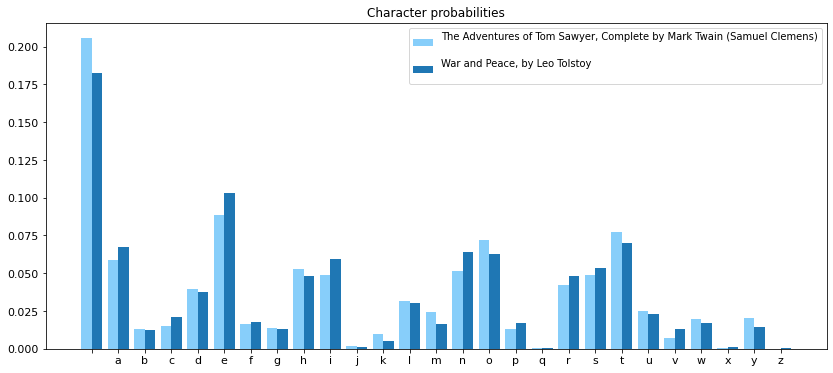

In [31]:
plotGraph(text_x_norm, text_y_norm, 'Character probabilities')

## Úloha 3
 Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

In [164]:
# Test nezavislosti v kontingencnej tabulke

## Úloha 4
Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.

In [165]:
#

## Úloha 5
Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

In [166]:
# Test nezavislosti v kontingencnej tabulke